In this script, we perform a multiple coherence analysis to assess the linear relationship between large scale teleconnection indices, meteorological factors on vegetation changes over different parts of east Africa. We start by raeding the data from the directortory where it is save. The data is standarized and noise removed with empirical mode decomposition along with dynamic fluctuation analysis

In [478]:
setwd("~/Documents/Article2/Climate data/Classes/Datasets/Class I")

Loading libraries required

In [479]:
library(vectorwavelet)
library(biwavelet)
library(WaveletComp)

In [480]:
Data= read.csv("Cleaned_data.csv")
#Data= read.csv("Denoised_data.csv")
#Data = Data[24:468,]
Data

Date,PR,T,NDVI,ET,VPD,Wdef,Rad,SM1,SM2,SM3,SM4,NINO3.4,PDO,NAO,DMI,SPEI_3,SPEI_6,SPEI_12,SPEI_24
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1982-01-01,-0.88937348,-1.33092079,0.667096215,-0.90919266,0.1657301,0.93122271,-0.139190147,-0.776818282,-0.52545869,0.11720647,0.04731196,0.11441222,0.30329779,-0.939980097,0.45866353,NA,NA,NA,NA
1982-02-01,-0.77159232,-0.39574593,0.220069751,-1.14660100,1.1086990,0.67736802,1.030879286,-1.119004717,-0.66560763,-0.03674575,-0.08729394,-0.06470302,0.03431283,1.003816758,0.57026325,NA,NA,NA,NA
1982-03-01,-0.52472276,0.93595970,0.301469646,-1.05757287,1.5931643,1.25670102,2.049031151,-1.033458109,-0.75904025,-0.03674575,-0.22189984,-0.06470302,-0.12707815,1.003816758,0.29277204,0.17315678,NA,NA,NA
1982-04-01,-0.25969855,1.37434214,-0.620365659,-0.20720229,-0.1401662,0.25437124,-0.008860938,-0.240824549,0.12856968,0.01457166,-0.22189984,0.20923793,-0.42296161,0.003333083,0.41342039,0.11431319,NA,NA,NA
1982-05-01,-0.25969855,1.06707907,1.149489990,-0.07098391,-0.9125692,-1.11778637,-1.069839212,-0.173407324,1.06289593,0.06588906,-0.22189984,0.68336650,-0.88023604,-0.596957122,0.73917094,0.08715264,NA,NA,NA
1982-06-01,-0.23875118,0.78011127,0.987330601,0.61417753,-0.3237542,-0.27674596,-0.211071618,0.278256559,0.36215124,-0.03674575,-0.35650574,1.11535030,-0.68298040,-1.645082877,0.94125693,0.62876991,0.49796697,NA,NA
1982-07-01,-0.18855514,-0.29157081,0.055951589,-0.24642771,-0.5938905,-0.08055196,-0.561954922,-0.177992021,-0.24516082,-0.29333278,-0.35650574,0.88355412,0.31226395,1.003816758,0.92014347,0.68470384,0.40483012,NA,NA
1982-08-01,-0.33136805,-0.79332478,-0.214465927,-0.21109909,-0.6607105,0.24818914,0.236015470,-0.006898803,-0.24516082,-0.34465018,-0.35650574,1.12588649,0.13294064,0.155787738,0.94125693,0.69751023,0.34014460,NA,NA
1982-09-01,-0.30581835,0.45510005,0.144406847,-0.73820213,0.1601578,0.48349808,0.989917761,-0.627856264,-0.47874238,-0.34465018,-0.49111164,1.42089982,0.66194440,1.585050131,1.48115830,1.42327462,1.35824560,NA,NA


In [483]:
t1 = cbind(Data$Date, Data$PR)
t = cbind(Data$Date, Data$NDVI)
t2 = cbind(Data$Date, Data$SPEI_12)
#t3 = cbind(Data$Date, Data$SPEI_24)
#t4 = cbind(Data$Date, Data$SPEI_3)
nrands=300
sum(is.na(t1))
sum(is.na(t2))
sum(is.na(t3))
t[is.na(t)] = 0
t[is.na(t2)] = 0
#wtc = wtc(t1,t2, nrands=nrands)



result = mwc(t,t1,t2, pad = TRUE,
#dj = 1/12,
#s0 = 2 * dt,
#J1 = NULL,
#max.scale = NULL,
#mother = "morlet",
#param = -1,
#lag1 = NULL,
#sig.level = 0.95,
#sig.test = 0,
#nrands = 300,
#quiet = FALSE
)

[1] 0

[1] 11

[1] 23

  |======================================================================| 100%


Warning message in contour.default(x$t, yvals, t(tmp), level = tol, col = col.sig, :
“toutes les valeurs z sont NA”


ERROR: Error in axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1983, 2020, : les longueurs de 'at' et de 'labels' diffèrent, 40 != 38


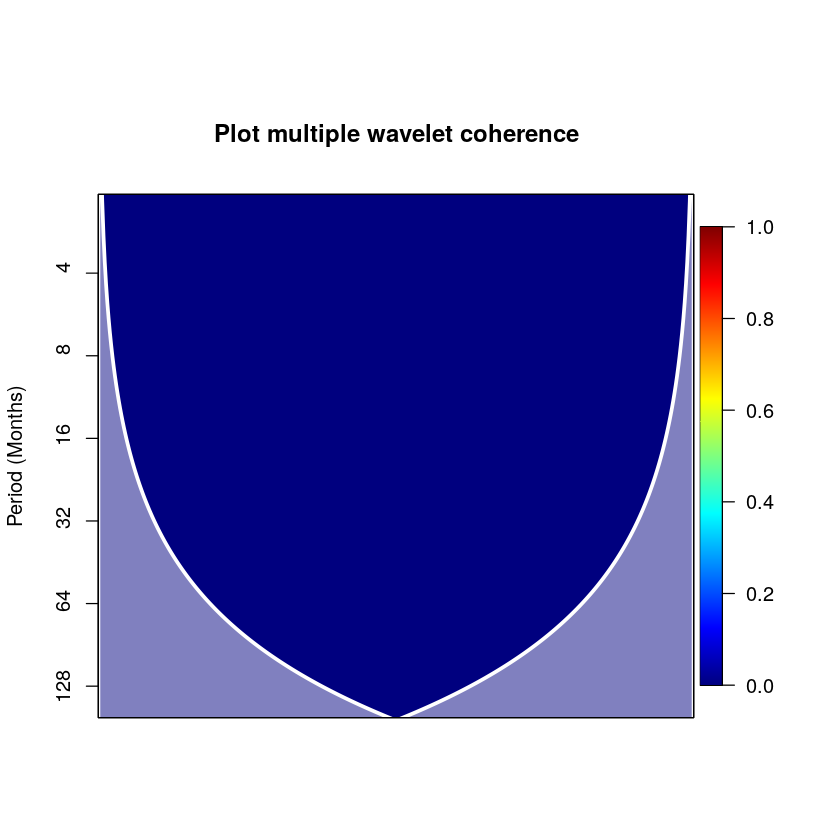

In [484]:
par(oma = c(0, 0, 3, 1), mar = c(5, 4, 5, 5) + 0.1)
plot.vectorwavelet(result, plot.cb = TRUE, xaxt = 'n', lty.coi = 1, plot.sig = TRUE,
                   col.coi = "white", lwd.coi = 3, lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.2, 
                   ylab = "Period (Months)", xlab = "", main = "Plot multiple wavelet coherence")
n = length(t[, 1])
# Defining x labels
axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1983, 2020, 1)))
#dev.copy(pdf,'eac_PRE_NDVI.pdf')
dev.off()

In [218]:
t1 = cbind(Data$Date, Data$SPEI_12)
t2 = cbind(Data$Date, Data$NDVI)
nrands=100
sum(is.na(t1))
sum(is.na(t2))

t2[is.na(t2)] = 0
wtc = wtc(t1,t2, nrands=nrands)

par(oma = c(0, 0, 3, 1), mar = c(5, 4, 5, 5) + 0.1)
plot(wtc, plot.phase = TRUE, xaxt = 'n', lty.coi = 1, col.coi = "white", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.2, ylab = "Period (Months)", xlab = "", 
    plot.cb = T, main = "Wavelet coherence:PRE - NDVI")

n = length(t[, 1])
# Defining x labels
axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1982, 2020, 1)),las = 2)

[1] 11

[1] 0

  |======================================================================| 100%


Warning message in min(x):
“aucun argument trouvé pour min ; Inf est renvoyé”
Warning message in max(x):
“aucun argument pour max ; -Inf est renvoyé”


ERROR: Error in image.default(x$t, yvals, t(zvals), zlim = zlim, xlim = xlim, : invalid z limits


In [219]:
t1 = cbind(Data$Date, Data$Rad)
t = cbind(Data$Date, Data$NDVI)
t2 = cbind(Data$Date, Data$T)
#t3 = cbind(Data$Date, Data$ET)
#t4 = cbind(Data$Date, Data$VPD)
nrands=300
sum(is.na(t1))
sum(is.na(t2))
#sum(is.na(t3))
#sum(is.na(t4))

t[is.na(t)] = 0
#wtc = wtc(t1,t2, nrands=nrands)



result = mwc(t,t1,t2, pad = TRUE,
#dj = 1/12,
#s0 = 2 * dt,
#J1 = NULL,
#max.scale = NULL,
#mother = "morlet",
#param = -1,
#lag1 = NULL,
#sig.level = 0.95,
#sig.test = 0,
#nrands = 300,
#quiet = FALSE
)

[1] 0

[1] 0

  |======================================================================| 100%


In [485]:
a1 = cbind(Data$Date, Data$NDVI)
a2 = cbind(Data$Date, Data$NINO3.4)
# Specify the number of iterations. The more, the better (>1000).  For the
# purpose of this tutorial, we just set it = 10
b1 = cbind(Data$Date, Data$NDVI)
b2 = cbind(Data$Date, Data$DMI)

c1 = cbind(Data$Date, Data$NDVI)
c2 = cbind(Data$Date, Data$NAO)

d1 = cbind(Data$Date, Data$NDVI)
d2 = cbind(Data$Date, Data$PDO)

nrands = 1000
wtc.A1A2 = wtc(a1, a2, nrands = nrands)
wtc.B1B2 = wtc(b1, b2, nrands = nrands)
wtc.C1C2 = wtc(c1, c2, nrands = nrands)
wtc.D1D2 = wtc(d1, d2, nrands = nrands)


# Plotting a graph
#par(oma = c(0, 0, 0, 2), mar = c(15, 4, 5, 5) + 0.1)
#par(mfrow = c(4, 1))


  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [646]:
names(wtc.D1D2)

[1] "coi"        "wave"       "wave.corr"  "power"      "power.corr"
 [6] "rsq"        "phase"      "period"     "scale"      "dt"        
[11] "t"          "xaxis"      "s0"         "dj"         "d1.sigma"  
[16] "d2.sigma"   "mother"     "type"       "signif"

In [704]:
mean(wtc.D1D2$power)

[1] 6.130331

In [706]:
x = (wtc.A1A2$power)
y = (wtc.B1B2$power)
z = (wtc.C1C2$power)
t = (wtc.D1D2$power)

In [707]:
#x=((wtc.A1A2$signif)/(wtc.A1A2$power))
counter = 0
for(val in x){
    if(val >=1)
        counter = counter+1
}
print(counter)


[1] 13417


In [708]:
13417*100/36036

[1] 37.23221

In [709]:
counter = 0
for(val in y){
    if(val >=1)
        counter = counter+1
}
print(counter)


[1] 12023


In [710]:
12023*100/36036

[1] 33.36386

In [711]:
counter = 0
for(val in z){
    if(val >=1)
        counter = counter+1
}
print(counter)


[1] 10389


In [712]:
10389*100/36036

[1] 28.8295

In [713]:
counter = 0
for(val in t){
    if(val >=1)
        counter = counter+1
}
print(counter)


[1] 14127


In [714]:
14127*100/36036

[1] 39.20246

In [450]:
mean(wtc.A1A2$signif)
mean(wtc.B1B2$signif)
mean(wtc.C1C2$signif)
mean(wtc.D1D2$signif)

[1] 0.7348962

[1] 0.7374763

[1] 0.7349013

[1] 0.736469

jpeg 
   3

png 
  2

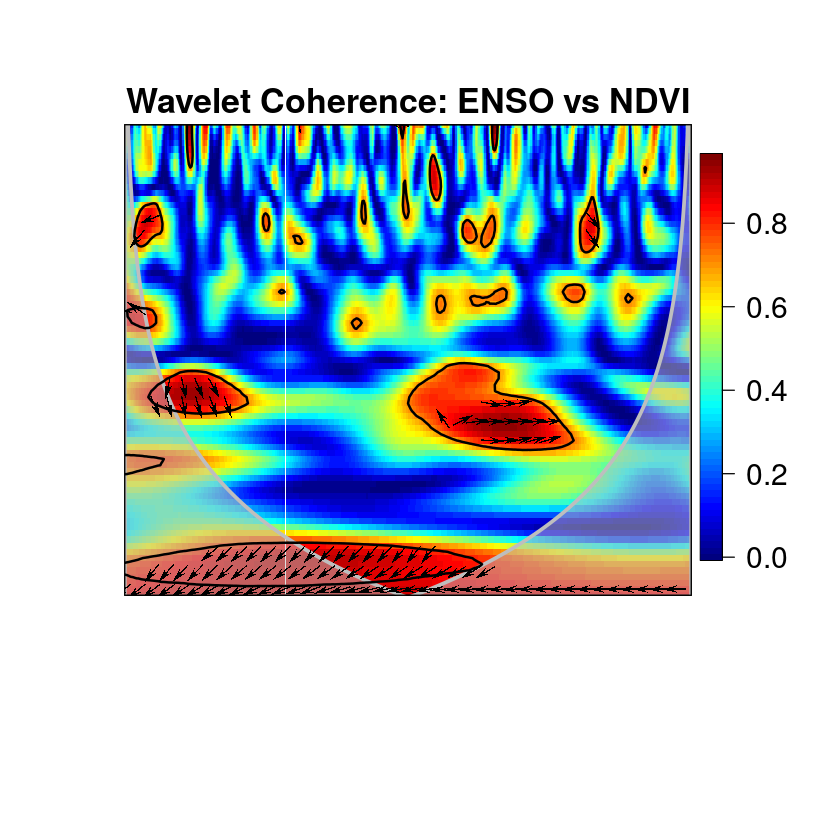

In [37]:
par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.2)
plot(wtc.A1A2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5)
title(main = "Wavelet Coherence: ENSO vs NDVI",line = 0.5, cex.main=1.7)
dev.copy(jpeg,'ENSO vs NDVI1.jpeg')
dev.off()

null device 
          1

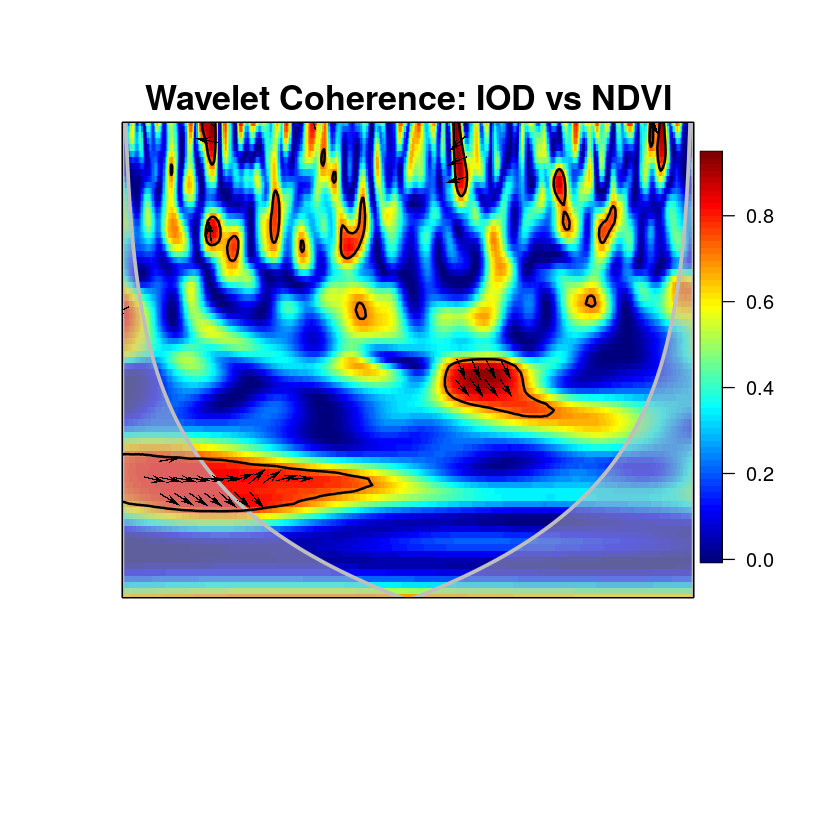

In [38]:
par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.B1B2, plot.phase = TRUE, xaxt = 'n',
      yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T)
title(main = "Wavelet Coherence: IOD vs NDVI",line = 0.5,cex.main=1.7)
#dev.copy(pdf,'IOD vs NDVI.pdf')
dev.off()

null device 
          1

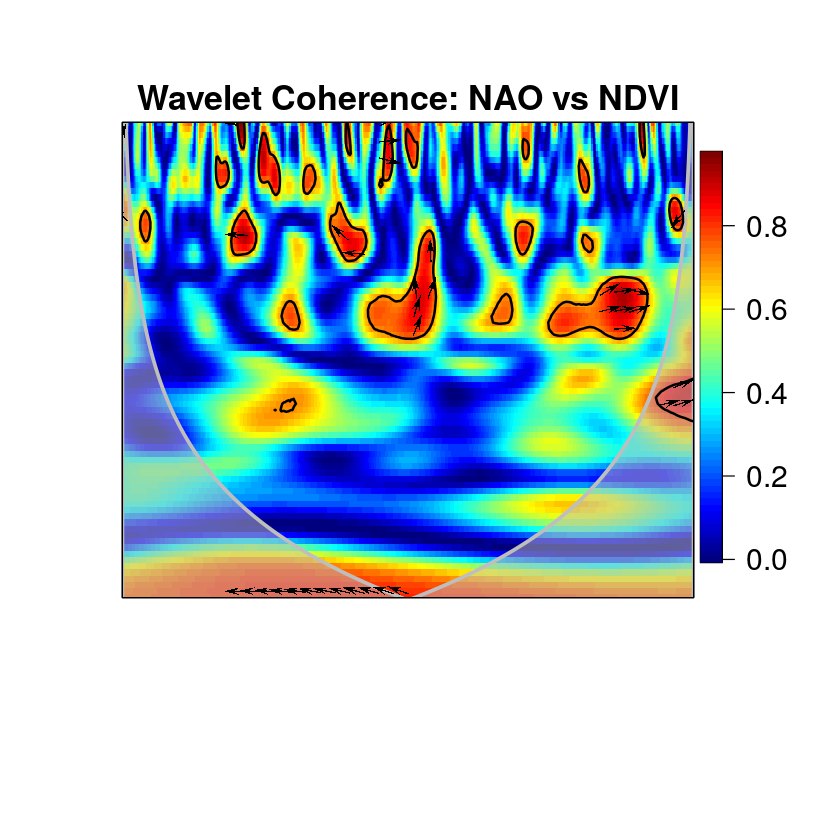

In [39]:
par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.C1C2, plot.phase = TRUE, xaxt = 'n',
      yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5)
title(main = "Wavelet Coherence: NAO vs NDVI", line = 0.5,cex.main=1.7)
#dev.copy(pdf,'NAO vs NDVI.pdf')
dev.off()

ERROR: Error in axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1981, 2020, : les longueurs de 'at' et de 'labels' diffèrent, 39 != 40


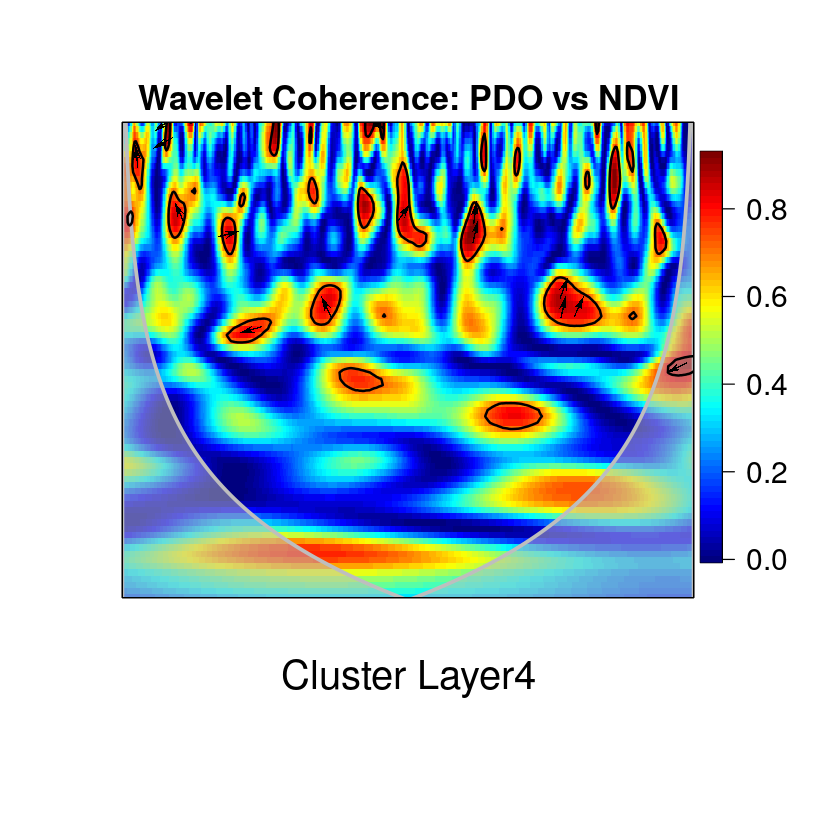

In [40]:
#par(oma = c(0, 0, 0, 2), mar = c(15, 4, 5, 5) + 0.1)
#plot(wtc.D1D2, plot.phase = TRUE, xaxt = 'n',yaxt = 'n',lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
#    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, ylab = "", xlab = "Cluster Layer2", 
#    plot.cb = F)

# Adding grid lines
n = length(t1[, 1])
#abline(v = seq(12, n, 12), h = 1:39, col = "brown", lty = 1, lwd = 1)

# Defining x labels


par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.D1D2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "Cluster Layer4", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: PDO vs NDVI",line = 0.5, cex.main=1.7)
axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1981, 2020, 1)),cex.axis=1.4,las = 1)
dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

# Individual meteorological factors explaining baseflow change

In [715]:
a1 = cbind(Data$Date, Data$NDVI)
a2 = cbind(Data$Date, Data$PR)
# Specify the number of iterations. The more, the better (>1000).  For the
# purpose of this tutorial, we just set it = 10
b1 = cbind(Data$Date, Data$NDVI)
b2 = cbind(Data$Date, Data$T)

c1 = cbind(Data$Date, Data$NDVI)
c2 = cbind(Data$Date, Data$VPD)

d1 = cbind(Data$Date, Data$NDVI)
d2 = cbind(Data$Date, Data$ET)

e1 = cbind(Data$Date, Data$NDVI)
e2 = cbind(Data$Date, Data$Wdef)

f1 = cbind(Data$Date, Data$NDVI)
f2 = cbind(Data$Date, Data$Rad)

g1 = cbind(Data$Date, Data$NDVI)
g2 = cbind(Data$Date, Data$SM1)

h1 = cbind(Data$Date, Data$NDVI)
h2 = cbind(Data$Date, Data$SM2)

i1 = cbind(Data$Date, Data$NDVI)
i2 = cbind(Data$Date, Data$SM3)

j1 = cbind(Data$Date, Data$NDVI)
j2 = cbind(Data$Date, Data$SM4)

k1 = cbind(Data$Date, Data$NDVI)
k2 = cbind(Data$Date, Data$SPEI_3)

l1 = cbind(Data$Date, Data$NDVI)
l2 = cbind(Data$Date, Data$SPEI_6)

m1 = cbind(Data$Date, Data$NDVI)
m2 = cbind(Data$Date, Data$SPEI_12)

n1 = cbind(Data$Date, Data$NDVI)
n2 = cbind(Data$Date, Data$SPEI_24)

nrands = 1000

wtc.A1A2 = wtc(a1, a2, nrands = nrands)
wtc.B1B2 = wtc(b1, b2, nrands = nrands)
wtc.C1C2 = wtc(c1, c2, nrands = nrands)
wtc.D1D2 = wtc(d1, d2, nrands = nrands)

wtc.E1E2 = wtc(e1, e2, nrands = nrands)
wtc.F1F2 = wtc(f1, f2, nrands = nrands)
wtc.G1G2 = wtc(g1, g2, nrands = nrands)
wtc.H1H2 = wtc(h1, h2, nrands = nrands)

wtc.I1I2 = wtc(i1, i2, nrands = nrands)
wtc.J1J2 = wtc(j1, j2, nrands = nrands)
#wtc.K1K2 = wtc(k1, k2, nrands = nrands)
#wtc.L1L2 = wtc(l1, l2, nrands = nrands)

#wtc.M1M2 = wtc(m1, m2, nrands = nrands)
#wtc.N1N2 = wtc(n1, n2, nrands = nrands)



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [442]:
length(wtc.A1A2$power)

[1] 36036

In [716]:
#((wtc.A1A2$signif)/(wtc.A1A2$power))

# The following for loop help to identify the significant power of the WC

In [717]:
a=wtc.A1A2$power
b=wtc.B1B2$power
c=wtc.C1C2$power
d=wtc.D1D2$power
e=wtc.E1E2$power
f=wtc.F1F2$power
g=wtc.G1G2$power
h=wtc.H1H2$power
i=wtc.I1I2$power
j=wtc.J1J2$power


In [734]:
#x=((wtc.A1A2$signif)/(wtc.A1A2$power))
counter = 0
for(val in i){
    if(val >=1)
        counter = counter+1
}
print(counter)

[1] 13065


In [733]:
13065 *100/36036

[1] 36.25541

In [437]:
val

[1] 2985.096

In [422]:
length(wtc.A1A2$signif)

[1] 36036

In [245]:
#wtc.K1K2 = wtc(k1, k2, nrands = nrands)
#wtc.L1L2 = wtc(l1, l2, nrands = nrands)
#nrands = 100
#wtc.M1M2 = wtc(m1, m2, nrands = nrands)


In [11]:
n1 = cbind(Data$Date, Data$NDVI)
n2 = cbind(Data$Date, Data$SPEI_24)
wtc.N1N2 = wtc(n1, n2, nrands = nrands)

ERROR: Error in check.datum(x1): Error: the data must be in the form of an n x 2 matrix containing the time steps in column 1 and the values in column 2


In [406]:
mean(wtc.K1K2$signif)#SPEI3
mean(wtc.L1L2$signif)#SPEI6
mean(wtc.M1M2$signif)#SPEI12
mean(wtc.N1N2$signif)#SPEI24

ERROR: Error in mean(wtc.K1K2$signif): objet 'wtc.K1K2' introuvable


null device 
          1

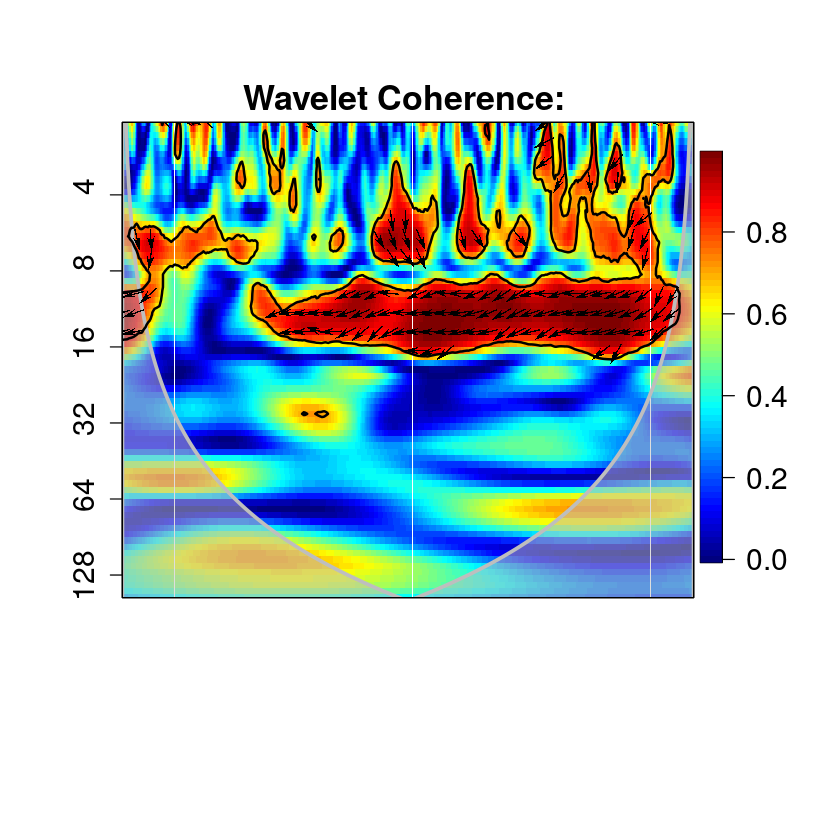

In [179]:
# Adding grid lines
n = length(t1[, 1])
#abline(v = seq(12, n, 12), h = 1:39, col = "brown", lty = 1, lwd = 1)

# Defining x labels


par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.A1A2, plot.phase = TRUE, xaxt = 'n',
    # yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: ",line = 0.5, cex.main=1.7)
#axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1982, 2020, 1)),cex.axis=1.4,las = 1)
#dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

null device 
          1

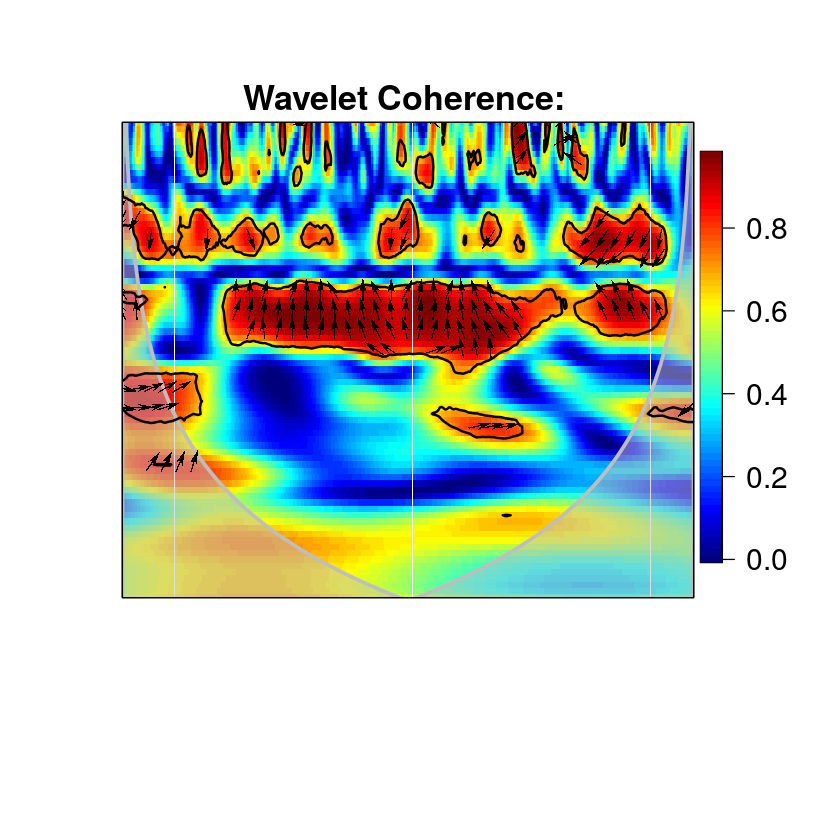

In [139]:
n = length(t1[, 1])

par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.B1B2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: ",line = 0.5, cex.main=1.7)
#axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1982, 2020, 1)),cex.axis=1.4,las = 1)
#dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

null device 
          1

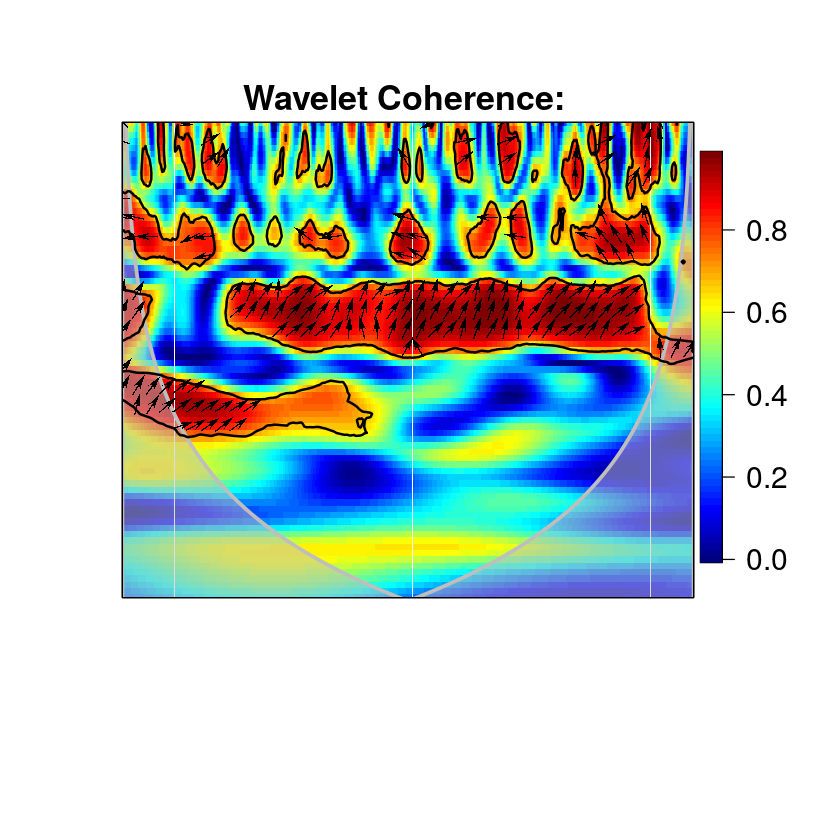

In [140]:
n = length(t1[, 1])

par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.C1C2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: ",line = 0.5, cex.main=1.7)
#axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1982, 2020, 1)),cex.axis=1.4,las = 1)
#dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

null device 
          1

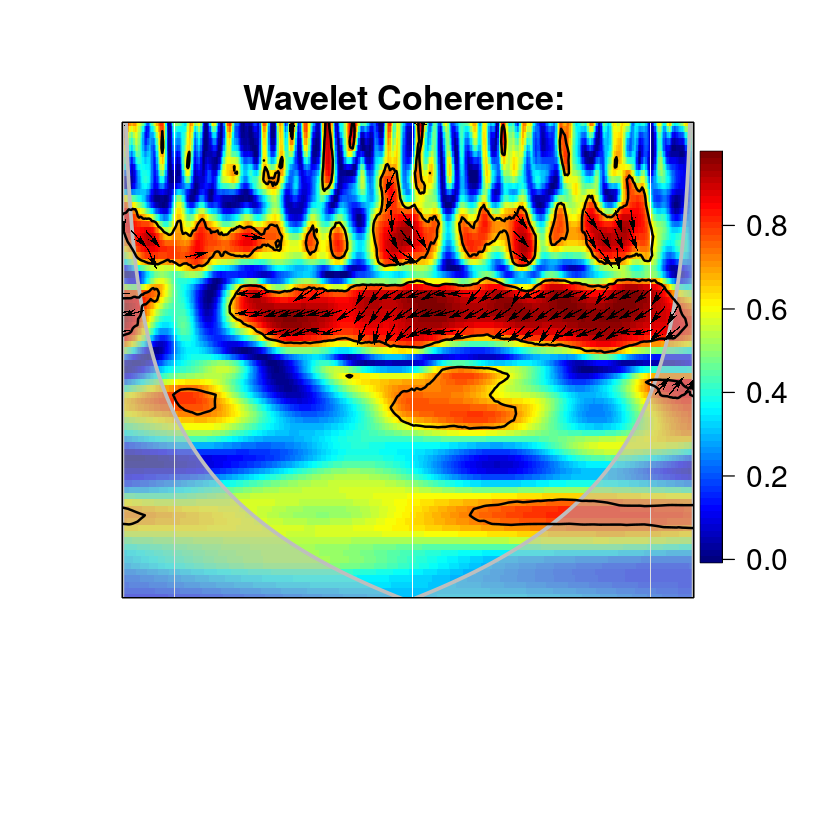

In [141]:
n = length(t1[, 1])

par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.D1D2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: ",line = 0.5, cex.main=1.7)
#axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1982, 2020, 1)),cex.axis=1.4,las = 1)
#dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

null device 
          1

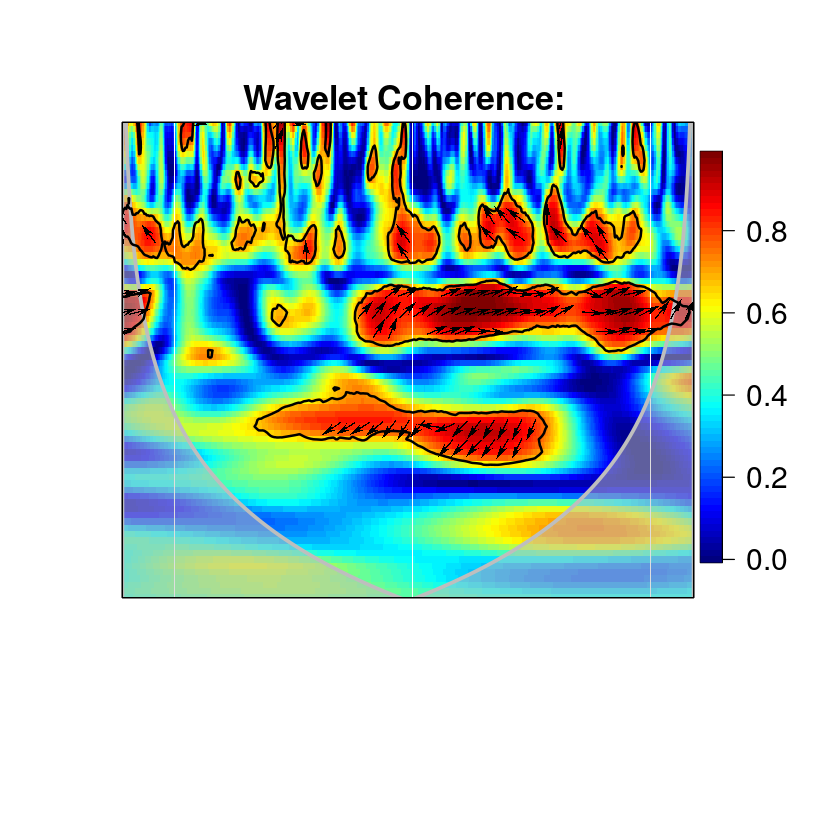

In [142]:
n = length(t1[, 1])

par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.E1E2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: ",line = 0.5, cex.main=1.7)
#axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1982, 2020, 1)),cex.axis=1.4,las = 1)
#dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

null device 
          1

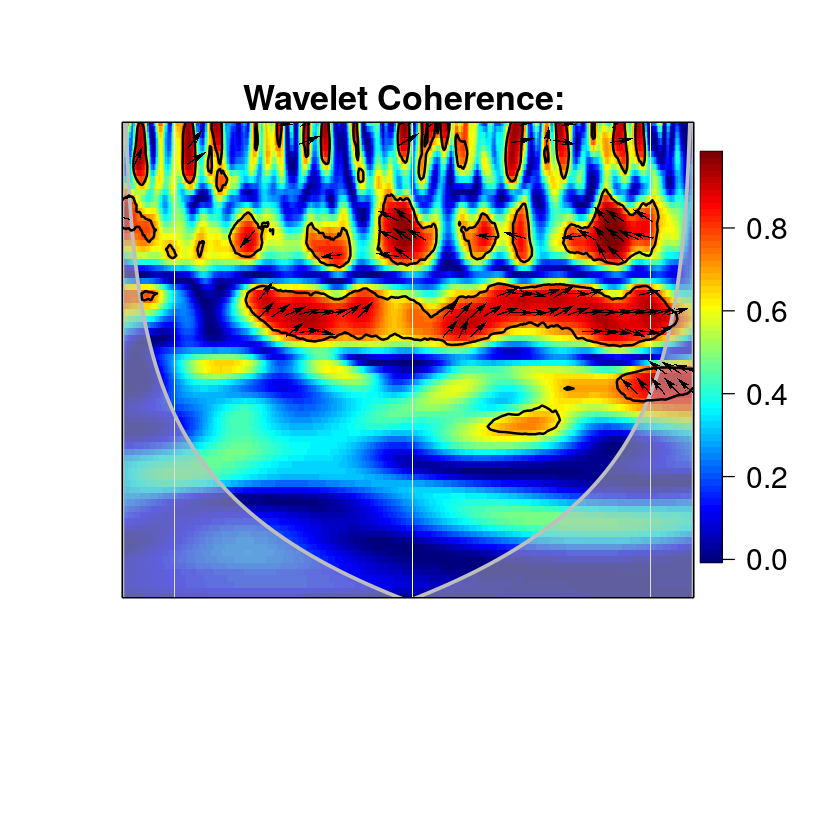

In [143]:
n = length(t1[, 1])

par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.F1F2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: ",line = 0.5, cex.main=1.7)
#axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1982, 2020, 1)),cex.axis=1.4,las = 1)
#dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

null device 
          1

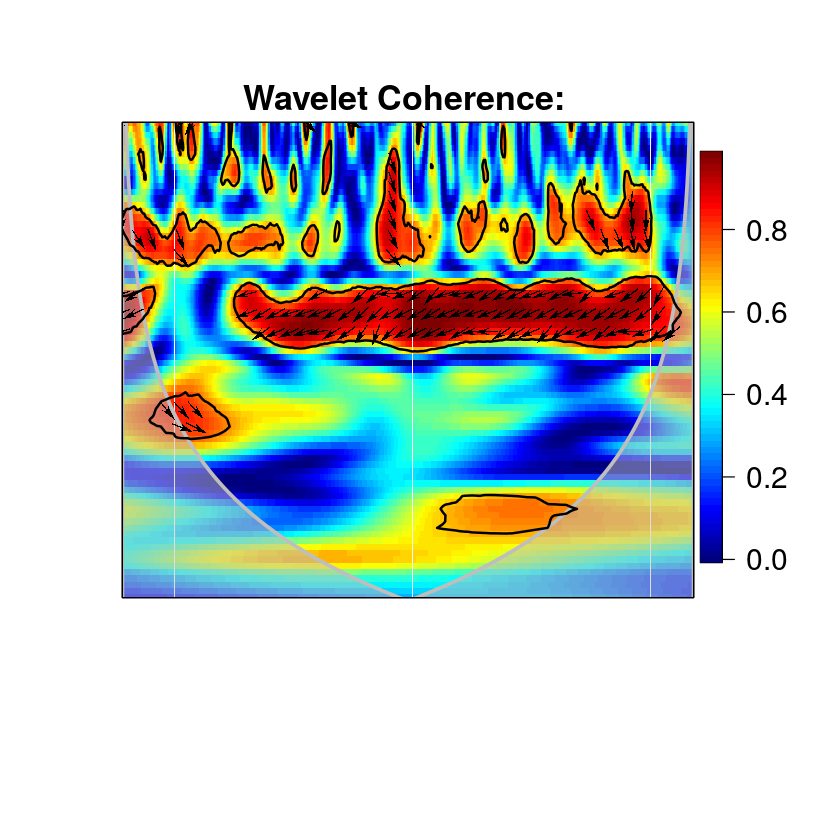

In [144]:
n = length(t1[, 1])

par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.G1G2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: ",line = 0.5, cex.main=1.7)
#axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1982, 2020, 1)),cex.axis=1.4,las = 1)
#dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

null device 
          1

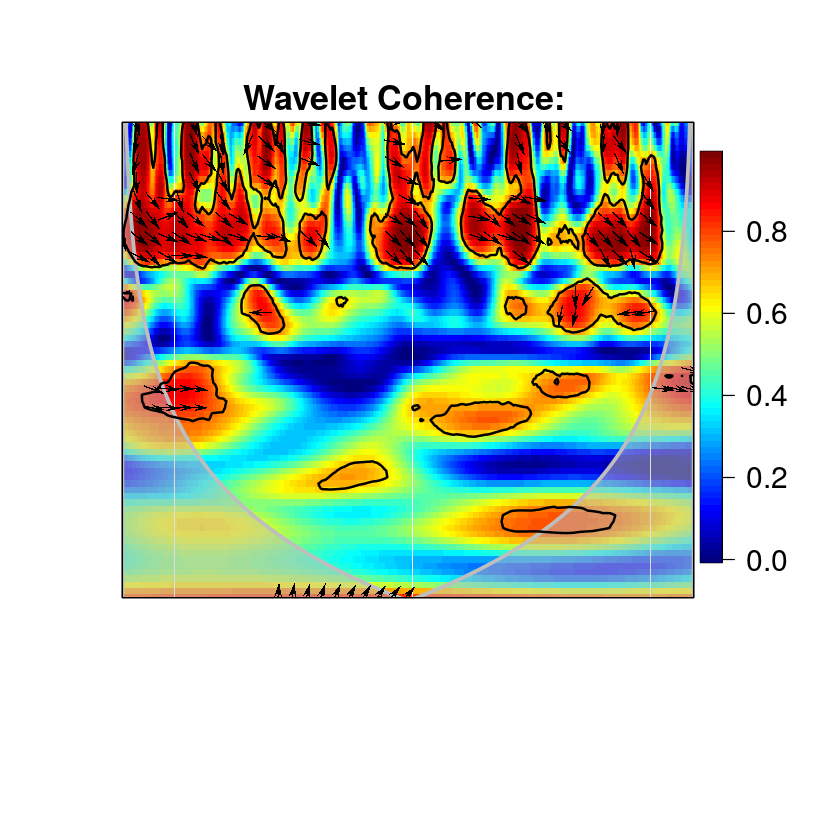

In [145]:
n = length(t1[, 1])

par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.H1H2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: ",line = 0.5, cex.main=1.7)
#axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1982, 2020, 1)),cex.axis=1.4,las = 1)
#dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

null device 
          1

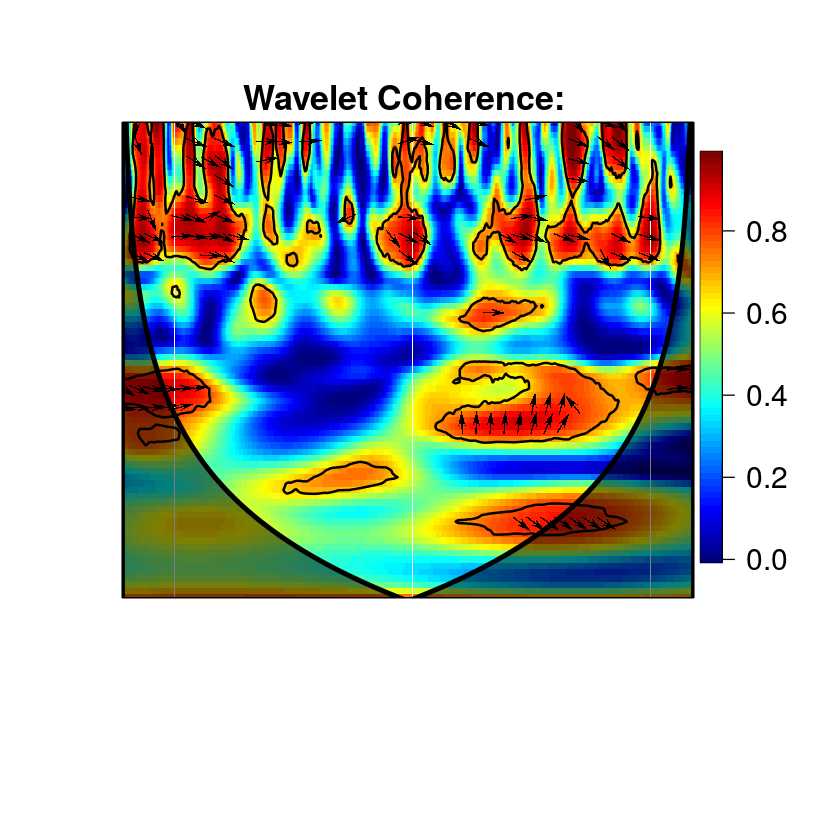

In [148]:
n = length(t1[, 1])

par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.I1I2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "BLACK", lwd.coi = 4, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: ",line = 0.5, cex.main=1.7)
#axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1982, 2020, 1)),cex.axis=1.4,las = 1)
#dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

null device 
          1

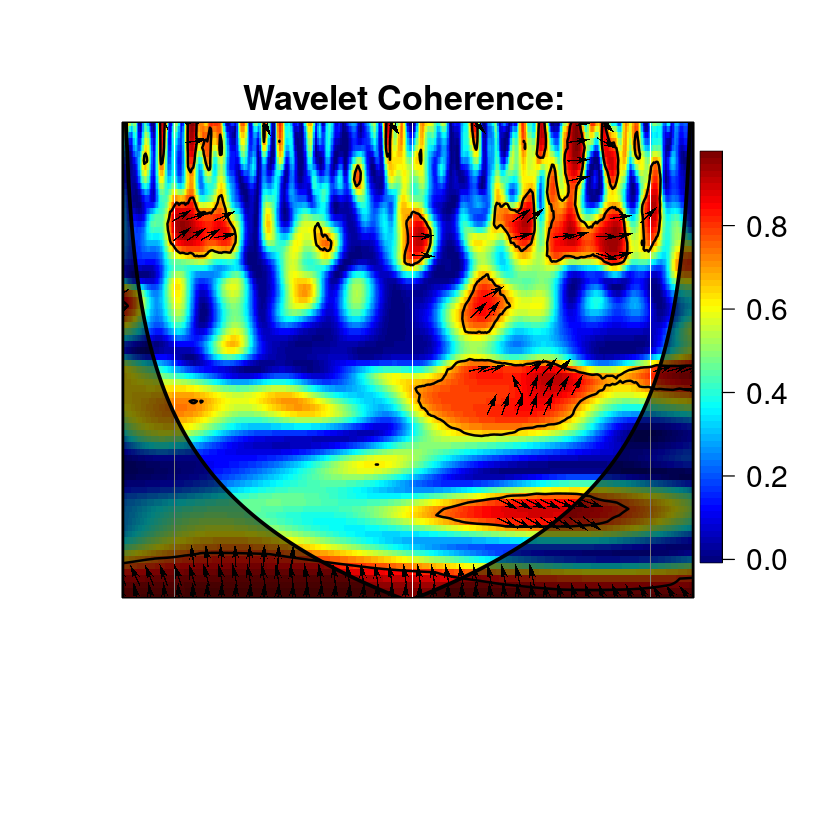

In [149]:
n = length(t1[, 1])

par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.J1J2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "black", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: ",line = 0.5, cex.main=1.7)
#axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1982, 2020, 1)),cex.axis=1.4,las = 1)
#dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

null device 
          1

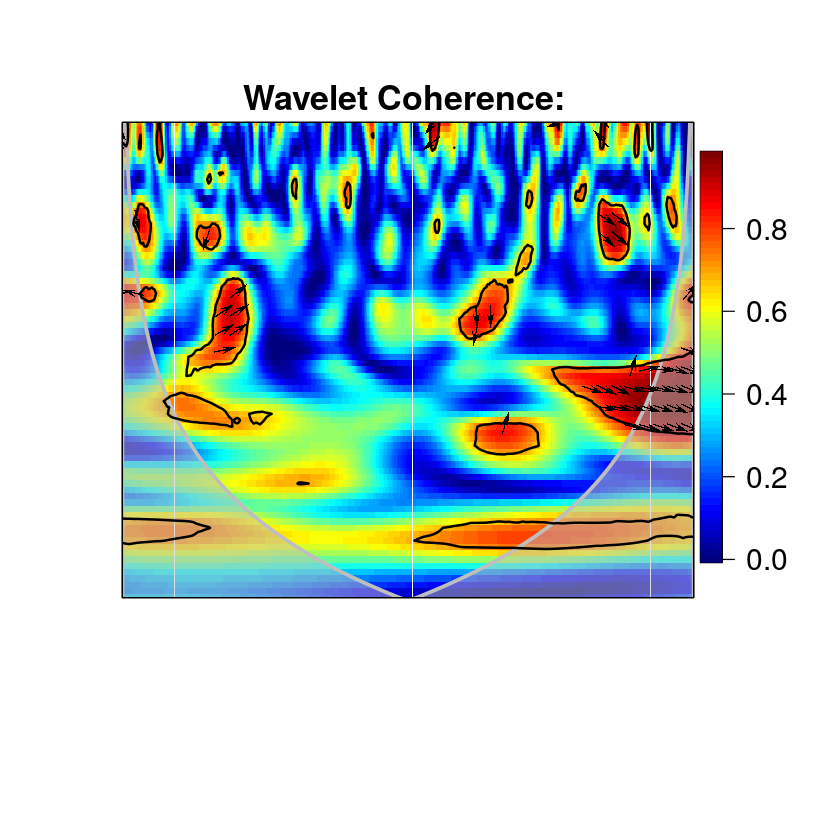

In [150]:
n = length(t1[, 1])

par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.K1K2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: ",line = 0.5, cex.main=1.7)
#axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1982, 2020, 1)),cex.axis=1.4,las = 1)
#dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

null device 
          1

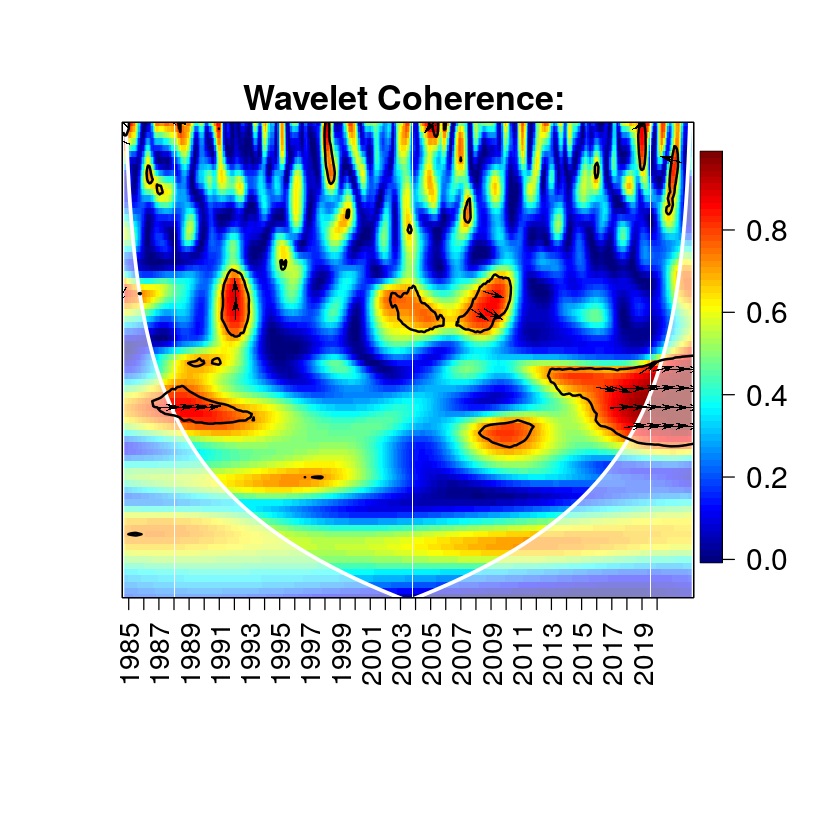

In [154]:
n = length(t1[, 1])

par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.L1L2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "white", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: ",line = 0.5, cex.main=1.7)
axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1983, 2020, 1)),cex.axis=1.4,las = 2)
#dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

null device 
          1

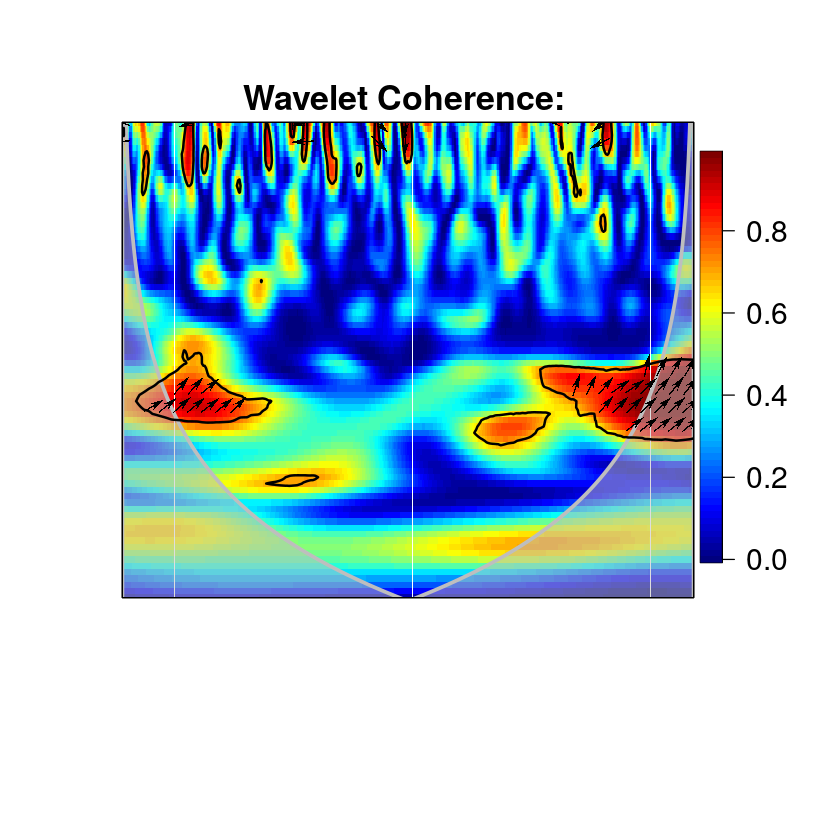

In [152]:
n = length(t1[, 1])

par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.M1M2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: ",line = 0.5, cex.main=1.7)
#axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1982, 2020, 1)),cex.axis=1.4,las = 1)
#dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

null device 
          1

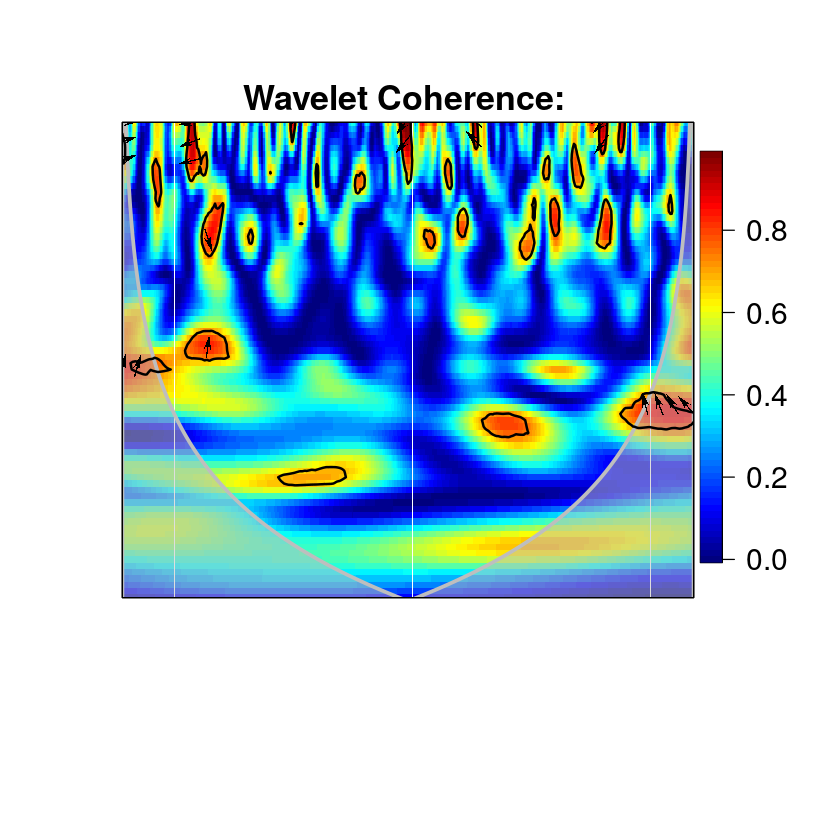

In [155]:
n = length(t1[, 1])

par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1)
plot(wtc.N1N2, plot.phase = TRUE, xaxt = 'n',
     yaxt = 'n',
     lty.coi = 1, col.coi = "grey", lwd.coi = 3, 
    lwd.sig = 2, arrow.lwd = 0.03, arrow.len = 0.12, 
     ylab = "",
     xlab = "", 
    plot.cb = T, cex.lab=2, cex.axis = 1.5,cex=1.5,cex.sub=1.5)
n = length(t1[, 1])
title(main = "Wavelet Coherence: ",line = 0.5, cex.main=1.7)
#axis(side = 1, at = c(seq(0, n, 12)), labels = c(seq(1982, 2020, 1)),cex.axis=1.4,las = 1)
#dev.copy(pdf,'PDO vs NDVI.pdf')
dev.off()

## plot of average coherence

In [674]:
library(WaveletComp)
Data= read.csv("Cleaned_data2.csv")
#Data = Data[24:468,]
Data

Date,PR,T,NDVI,ET,VPD,Wdef,Rad,SM1,SM2,SM3,SM4,NINO3.4,PDO,NAO,DMI
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1982-01-01,-0.88937348,-1.33092079,0.667096215,-0.90919266,0.1657301,0.93122271,-0.139190147,-0.776818282,-0.52545869,0.11720647,0.04731196,0.11441222,0.30329779,-0.939980097,0.45866353
1982-02-01,-0.77159232,-0.39574593,0.220069751,-1.14660100,1.1086990,0.67736802,1.030879286,-1.119004717,-0.66560763,-0.03674575,-0.08729394,-0.06470302,0.03431283,1.003816758,0.57026325
1982-03-01,-0.52472276,0.93595970,0.301469646,-1.05757287,1.5931643,1.25670102,2.049031151,-1.033458109,-0.75904025,-0.03674575,-0.22189984,-0.06470302,-0.12707815,1.003816758,0.29277204
1982-04-01,-0.36326771,1.37434214,-0.620365659,-0.23794884,-0.1401662,0.27536604,-0.008860938,-0.206507557,0.12856968,0.01457166,-0.22189984,0.20923793,-0.42296161,0.003333083,0.41342039
1982-05-01,-0.36326771,1.06707907,1.149489990,-0.23794884,-0.9125692,-1.11778637,-1.069839212,-0.206507557,1.06289593,0.06588906,-0.22189984,0.68336650,-0.88023604,-0.596957122,0.73917094
1982-06-01,-0.23875118,0.78011127,0.987330601,0.61417753,-0.3237542,-0.27674596,-0.211071618,0.278256559,0.36215124,-0.03674575,-0.35650574,1.11535030,-0.68298040,-1.645082877,0.94125693
1982-07-01,-0.18855514,-0.29157081,0.055951589,-0.24642771,-0.5938905,-0.08055196,-0.561954922,-0.177992021,-0.24516082,-0.29333278,-0.35650574,0.88355412,0.31226395,1.003816758,0.92014347
1982-08-01,-0.33136805,-0.79332478,-0.214465927,-0.21109909,-0.6607105,0.24818914,0.236015470,-0.006898803,-0.24516082,-0.34465018,-0.35650574,1.12588649,0.13294064,0.155787738,0.94125693
1982-09-01,-0.30581835,0.45510005,0.144406847,-0.73820213,0.1601578,0.48349808,0.989917761,-0.627856264,-0.47874238,-0.34465018,-0.49111164,1.42089982,0.66194440,1.585050131,1.48115830


In [691]:
my.wc = analyze.coherency(Data, my.pair = c(6,4), loess.span=0, 
                          dt=1, dj=1/20,
                          window.size.t=5, window.size.s=1/2, window.type.t = 6,
                          lowerPeriod=2, upperPeriod = 200,
                          make.pval=TRUE, n.sim=100)
mean(my.wc$Coherence)

Starting wavelet transformation and coherency computation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave.xy Angle sWave.xy sAngle Power.xy Power.xy.avg Power.xy.pval Power.xy.avg.pval Coherency Coherence Coherence.avg Coherence.pval Coherence.avg.pval Wave.x Wave.y Phase.x Phase.y Ampl.x Ampl.y Power.x Power.y Power.x.avg Power.y.avg Power.x.pval Power.y.pval Power.x.avg.pval Power.y.avg.pval sPower.x sPower.y Ridge.xy Ridge.co Ridge.x Ridge.y Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


[1] 0.763437

In [692]:
x=((my.wc$Power.xy)/(my.wc$Power.xy.pval))
counter = 0
for(val in x){
    if(val >=1)
        counter = counter+1
}
print(counter)


[1] 9586


In [693]:
9586*100/62244

[1] 15.40068

In [630]:
my.wc$Coherence.pval

0.23,0.15,0.19,0.45,0.71,0.93,0.94,0.68,0.21,0.33,⋯,0.96,0.83,0.70,0.59,0.53,0.40,0.37,0.56,0.67,0.68
0.22,0.14,0.17,0.42,0.71,0.95,0.97,0.68,0.19,0.31,⋯,0.97,0.82,0.71,0.60,0.54,0.40,0.35,0.57,0.66,0.69
0.23,0.13,0.15,0.44,0.72,0.97,0.98,0.69,0.17,0.25,⋯,0.97,0.86,0.72,0.62,0.56,0.36,0.36,0.54,0.66,0.72
0.24,0.11,0.12,0.45,0.72,0.98,0.99,0.69,0.16,0.25,⋯,0.96,0.84,0.75,0.66,0.56,0.36,0.35,0.53,0.67,0.69
0.28,0.10,0.08,0.44,0.73,0.98,1.00,0.71,0.27,0.22,⋯,0.98,0.86,0.77,0.71,0.58,0.37,0.34,0.55,0.68,0.73
0.34,0.11,0.12,0.41,0.71,0.99,0.99,0.67,0.29,0.24,⋯,0.97,0.92,0.82,0.81,0.64,0.41,0.38,0.57,0.77,0.73
0.48,0.29,0.27,0.45,0.74,0.99,0.98,0.71,0.32,0.29,⋯,0.99,0.94,0.87,0.83,0.71,0.51,0.50,0.69,0.78,0.76
0.58,0.51,0.44,0.49,0.73,0.99,0.95,0.69,0.38,0.32,⋯,0.96,0.93,0.89,0.84,0.79,0.65,0.66,0.84,0.83,0.80
0.76,0.65,0.62,0.52,0.71,0.98,0.93,0.67,0.38,0.29,⋯,0.97,0.89,0.87,0.86,0.84,0.76,0.84,0.90,0.80,0.75
0.92,0.84,0.76,0.53,0.67,0.92,0.89,0.66,0.37,0.25,⋯,0.96,0.84,0.86,0.92,0.87,0.86,0.92,0.85,0.73,0.61
0.95,0.95,0.87,0.56,0.66,0.80,0.81,0.66,0.37,0.20,⋯,0.92,0.84,0.90,0.94,0.90,0.95,0.87,0.72,0.46,0.42


In [627]:
x=((my.wc$Power.xy.pval)/(my.wc$Coherence))
min(x)

[1] 0

In [331]:
names(my.wc)

[1] "series"             "loess.span"         "dt"                
 [4] "dj"                 "Wave.xy"            "Angle"             
 [7] "sWave.xy"           "sAngle"             "Power.xy"          
[10] "Power.xy.avg"       "Power.xy.pval"      "Power.xy.avg.pval" 
[13] "Coherency"          "Coherence"          "Coherence.avg"     
[16] "Coherence.pval"     "Coherence.avg.pval" "Wave.x"            
[19] "Wave.y"             "Phase.x"            "Phase.y"           
[22] "Ampl.x"             "Ampl.y"             "Power.x"           
[25] "Power.y"            "Power.x.avg"        "Power.y.avg"       
[28] "Power.x.pval"       "Power.y.pval"       "Power.x.avg.pval"  
[31] "Power.y.avg.pval"   "sPower.x"           "sPower.y"          
[34] "Ridge.xy"           "Ridge.co"           "Ridge.x"           
[37] "Ridge.y"            "Period"             "Scale"             
[40] "nc"                 "nr"                 "coi.1"             
[43] "coi.2"              "axis.1"             "axis.2"            
[46] "date.format"        "date.tz"

In [477]:
min(my.wc$Power.xy.pval)

[1] 0

In [375]:
min(my.wc$Power.xy)

[1] 3.887744e-06

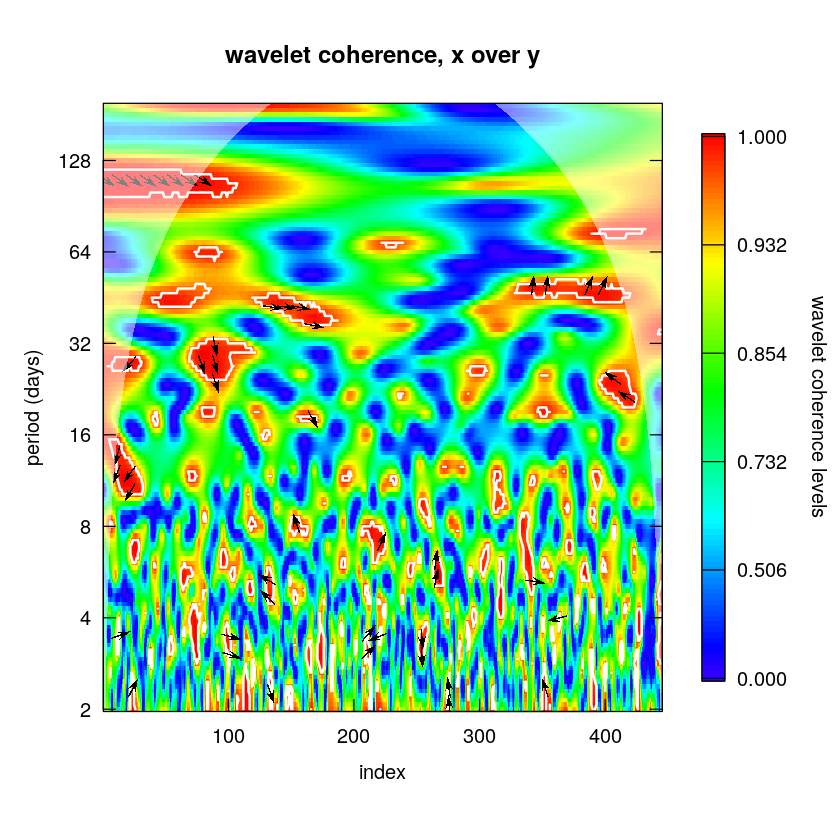

In [360]:
WC = wc.image(my.wc, which.image = "wc", main = "wavelet coherence, x over y",
legend.params = list(lab = "wavelet coherence levels",
lab.line = 3.5, label.digits = 3),
periodlab = "period (days)")

In [613]:
mean(my.wc$Coherence)

[1] 0.7548143

## Calculating for PNSC

In [340]:
for (k in my.wc$Coherence.avg){
  if (k > 1)
    next
    print(k)
}

[1] 0.8240539
[1] 0.7897398
[1] 0.7523636
[1] 0.7159711
[1] 0.6855382
[1] 0.6675506
[1] 0.6606893
[1] 0.6654011
[1] 0.6777026
[1] 0.6913989
[1] 0.702228
[1] 0.7067707
[1] 0.7029864
[1] 0.6932159
[1] 0.6815948
[1] 0.6706187
[1] 0.6628122
[1] 0.665086
[1] 0.6786456
[1] 0.6962301
[1] 0.7098202
[1] 0.7133973
[1] 0.7064745
[1] 0.6890377
[1] 0.6705373
[1] 0.6669021
[1] 0.6800192
[1] 0.7000224
[1] 0.7233371
[1] 0.7499158
[1] 0.7714426
[1] 0.782585
[1] 0.785664
[1] 0.7809036
[1] 0.7678618
[1] 0.7494569
[1] 0.7285473
[1] 0.7036297
[1] 0.6821836
[1] 0.675712
[1] 0.6719721
[1] 0.6658491
[1] 0.6646073
[1] 0.661373
[1] 0.6596137
[1] 0.6657903
[1] 0.6796348
[1] 0.7026448
[1] 0.7339677
[1] 0.7632435
[1] 0.7814825
[1] 0.7894012
[1] 0.7864776
[1] 0.7743166
[1] 0.7506903
[1] 0.7102942
[1] 0.6625289
[1] 0.6245312
[1] 0.5998471
[1] 0.5872534
[1] 0.5892009
[1] 0.6119501
[1] 0.6628394
[1] 0.7203103
[1] 0.7504114
[1] 0.7524608
[1] 0.7493014
[1] 0.7508492
[1] 0.7421357
[1] 0.716414
[1] 0.6880208
[1] 0.677818


In [345]:
min(k)

[1] 0.7598611

# Multiple coherence

In [571]:
t = Data$Date
#t

In [584]:
y <- cbind(t,Data$NDVI)
x <- cbind(t,Data$ENSO,Data$IOD,Data$NAO,Data$PDO)

In [585]:
result <- vwc(y, x, nrands = 10)

  |======================================================================| 100%


ERROR: Error in par(old.par): objet 'old.par' introuvable


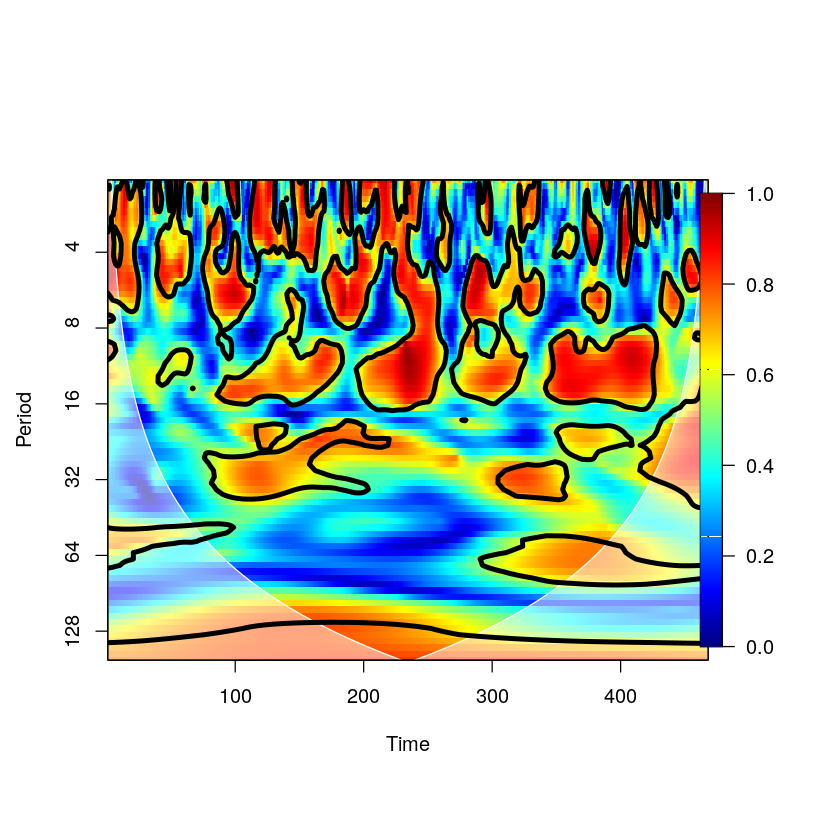

In [586]:
par(oma = c(0, 0, 0, 1), mar = c(10, 5, 5, 5) + 0.1,  pin = c(5,4))
plot.vectorwavelet(result, plot.cb = TRUE, main = "")

par(old.par)

In [587]:
names(result)

[1] "coi"    "rsq"    "phase"  "period" "scale"  "dt"     "t"      "xaxis" 
 [9] "s0"     "dj"     "mother" "type"   "signif"

In [588]:
length(result$rsq)

[1] 36036

In [597]:
x=((result$signif)/(result$rsq))

In [598]:
counter = 0
for(val in x){
    if(val >=1)
        counter = counter+1
}
print(counter)


[1] 24020


In [599]:
24020*100/36036

[1] 66.65557

In [243]:
mean(wtc.A1A2$power.corr)

[1] 13.12403

In [244]:
mean(wtc.B1B2$signif)

[1] 0.7387573

In [245]:
min(wtc.B1B2$signif)

[1] 0.6483225

In [76]:
mean(k)

[1] 3.38088

In [99]:
#result

In [67]:
names(result)

[1] "coi"    "rsq"    "phase"  "period" "scale"  "dt"     "t"      "xaxis" 
 [9] "s0"     "dj"     "mother" "type"   "signif"